#Proyecto 2: Clasificación morfológica y espectral de galaxias

![alt text](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/clasificacion_hubble.jpg)

En este taller trabajaremos con un catálogo de galaxias del survey astronómico Sloan Digital Sky Survey (SDSS). El SDSS es un proyecto internacional que comenzó a ejecutarse el año 2000 y desde entonces ha producido catálogos que contiene cientos de miles de galaxias. Mas información del survey en el link http://www.sdss.org/surveys/

El SDSS survey ha permitido que cualquier persona interesada en la Astronomia pueda visitar el sitio web y explorar las imagenes y catalogos del survey. Un ejemplo muy exitoso del uso de los datos del SDSS es el sitio web llamado Galaxy Zoo, el cual se puede visitar usando el siguiente link https://www.galaxyzoo.org/?lang=es

##Objetivo

Los alumnos deberán entender en qué consiste un sistema de clasificación y comprender la importancia de éste para ordenar y sistematizar el conocimiento. Deberán ser capaces de definir un sistema de clasificación de galaxias basado en información disponible en catálogos, imágenes y espectros de galaxias.

La Clasificación es el ordenamiento o la disposición por clases. Básicamente, la clasificación implicará la búsqueda en un todo de todas aquellas cosas que guarden o compartan algún tipo de relación para así agruparlas. Generalmente, el objetivo primordial de la clasificación es encontrar el mejor ordenamiento posible, es decir, el más claro, para que, llegado el momento de la búsqueda de determinado elemento que ha sido clasificado, éste resulte más fácil de encontrar: ese es, primordialmente, el fin de toda clasificación.


##Catálogo del SDSS con galaxias de diferentes tipos (data1)

Contiene una lista 40 galaxias que fueron observadas en el SDSS. Estas galaxias están relativamente cercanas y se pueden distinguir de buena manera sus caracteristicas morfologicas. El catálogo contiene las siguientes columnas,

- **ra**: Ascensión recta de la galaxia en unidades de grados
- **dec**: Declinación recta de la galaxias en unidades de grados
- **u**: Magnitud de la galaxias en el filtro u
- **g**: Magnitud de la galaxias en el filtro g
- **r**: Magnitud de la galaxias en el filtro r
- **i**: Magnitud de la galaxias en el filtro i
- **z**: Magnitud de la galaxias en el filtro z


##Catálogo del SDSS con 10.000 galaxias (data2)

Contiene una lista 10.000 galaxias que fueron observadas en el SDSS. Algunas de estas galaxias son cercanas y otras son muy lejanas. Contiene las mismas columnas que el catalogo data1, y solo aparecen estas nuevas columnas

- **l_gal**: Longitud galactica medida en unidades de grados
- **b_gal**: Latitud galactica medida en unidades de grados


##Ideas para desarrollar el taller

###1. Diseñar un sistema de clasificacion de tipos de galaxias usando imagenes
**Usar data1**

Desplegar imágenes JPG o FITS de las galaxias del catálogo data1. Inspeccionar cada uno de las imagens y definir que caracterísitcas diferencian unas de otras. Definir un criterio de clasificacón de galaxias basado solamente en el uso de imágenes y formas de las galaxias.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema
- Describa cada uno de las categorías
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 4 y 9.

###2. Diseñar un sistema de clasificacion de tipos de galaxias usando espectros 
**Usar data1**

Desplegar espectros de las galaxias del catálogo data1. Inspeccionar cada uno de los espectros y definir que caracterísitcas diferencian unos de otros. Definir un sistema de clasificación de galaxias basado solamente en el uso de espectros y formas de los espectros.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema
- Describa cada uno de las categorías
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 9

###3. Diseñar un sistema de clasificacion usando de manera conjunta imagenes y espectros
**Usar data1**

Desplegar tanto imágenes como espectros de las galaxias del catálogo data1. Definir un sistema de clasificación que este basado tanto en la morfología de las galaxias como la forma de sus espectros.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema. Puede basarser en las definidas en las partes 1 y 2.
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 9

###4. Analizar propiedades físicas de las galaxias y definir una clasificación cuantitativa
**Usar data1**

Hacer gráficos del tipo scatter e histogramas 2D usando la información como la magnitud y color de las galaxias. Deberá usar los valores disponibles en el catalogo data1 y calcular colores en base a las columnas de magnitud. Deberá ser capaz de distinguir diferentes secuencias de galaxias usando gráficos de puntos e histogramas.
- Para cada uno de las categorías definidas en el punto anterior, defina el rango de valores en magnitud y color que le corresponden.

Ver taller 4

###5. Aplicar el criterio cuantitativo derivado en la pregunta 4 y clasificar galaxias de manera automatizada
**Usar data2**

En base al sistema de clasificacón desarrollado entre las partes 1 a la 4, definir los tipos de galaxias de sus sistema de clasificación y los rangos de valores en magnitud y color para cada tipo de galaxia. A esto último le llamaremos criterios. Use estos criterios para clasificar de manera automatizada las 10.000 galaxias del catalogo data2.

In [1]:
integrante1 = 'Catalina Aguilar '
integrante2 = 'Natalia Navarro'
integrante3 = 'Alinne Ortega'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from sdss_tools import sdss_jpg, sdss_fits, sdss_spectra, sdss_template

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astroquery.sdss import SDSS

rc('font', size=14)
rc('axes', labelsize=22)

C:\Anaconda2\lib\site-packages\astroquery\sdss\__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [9]:
# Catalogo que contiene una muestra pequeña galaxias observadas en el SDSS y que fueron clasificadas en Galaxy Zoo

url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxyzoo_sample_n40.csv'
data1=pd.read_csv(url, sep=',', comment='#', header=0)
data1.head()

,ra,dec,u,g,r,i,z
0,239.495541,22.325141,18.48617,17.00311,16.26324,15.88828,15.56575
1,206.784942,17.059916,18.68597,17.34896,16.78204,16.44462,16.24426
2,129.116325,10.645035,16.48803,14.97490,14.30069,13.93282,13.67800
3,14.070919,-0.953293,19.53343,17.36526,16.25612,15.81089,15.44900
4,206.697198,28.670485,19.56450,17.61060,17.05630,16.75068,16.55159


In [4]:
# Catalogo que contiene una muestra grande de galaxias observadas en el SDSS

url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxias_colores.csv'
data2=pd.read_csv(url, sep=',', comment='#', header=0)
data2.head()

,ra,dec,l_gal,b_gal,u,g,r,i
0,151.618319,-2.525469,243.030957,40.426892,26.133486,22.424099,21.651247,20.942726
1,151.615648,-2.648741,243.153386,40.346226,23.131346,23.887920,22.252377,21.555195
2,151.619495,-2.628161,243.135812,40.362319,24.931240,23.586615,22.454304,21.069530
3,151.623650,-2.551494,243.061758,40.414409,22.898718,22.713753,22.143511,22.844065
4,151.624298,-2.673017,243.185139,40.337381,26.352110,23.204351,23.008493,22.019424


### Parte 1

In [5]:
coo=SkyCoord(data1['ra'], data1['dec'], unit=(u.deg,u.deg))

Procesando galaxia 1
Procesando galaxia 2
Procesando galaxia 3
Procesando galaxia 4
Procesando galaxia 5
Procesando galaxia 6
Procesando galaxia 7
Procesando galaxia 8
Procesando galaxia 9
Procesando galaxia 10
Procesando galaxia 11
Procesando galaxia 12
Procesando galaxia 13
Procesando galaxia 14
Procesando galaxia 15
Procesando galaxia 16
Procesando galaxia 17
Procesando galaxia 18
Procesando galaxia 19
Procesando galaxia 20
Procesando galaxia 21
Procesando galaxia 22
Procesando galaxia 23
Procesando galaxia 24
Procesando galaxia 25
Procesando galaxia 26
Procesando galaxia 27
Procesando galaxia 28
Procesando galaxia 29
Procesando galaxia 30
Procesando galaxia 31
Procesando galaxia 32
Procesando galaxia 33
Procesando galaxia 34
Procesando galaxia 35
Procesando galaxia 36
Procesando galaxia 37
Procesando galaxia 38
Procesando galaxia 39
Procesando galaxia 40


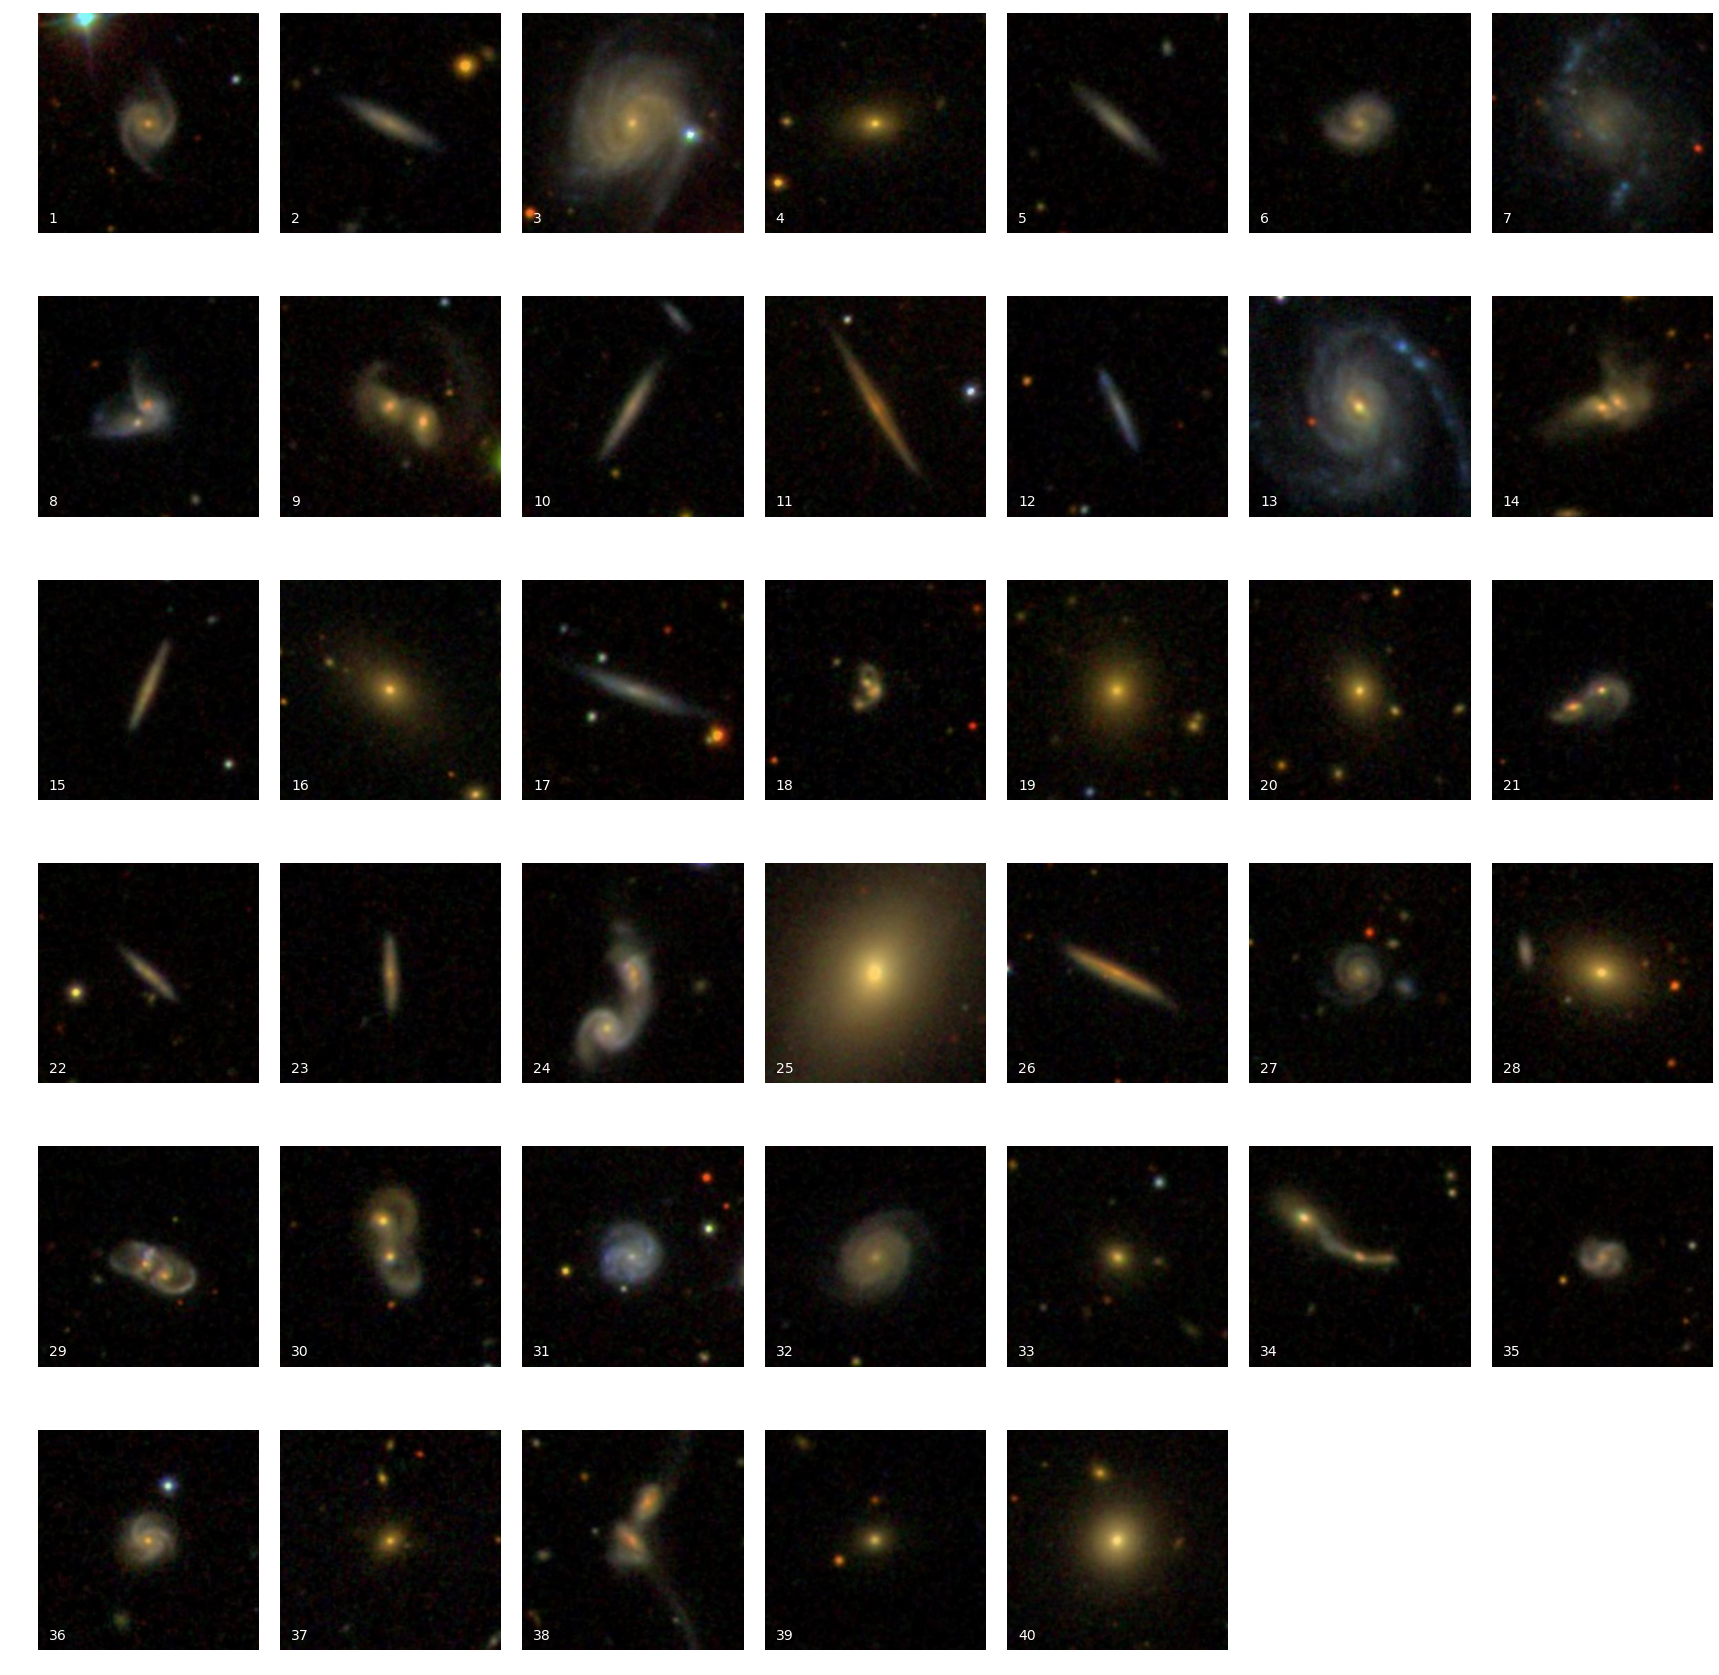

In [21]:
sdss_jpg(coo[0:40])

Clasificaremos las 40 galaxias en 3 categorias (morfológicamente):

1.-Elipticas: las galaxias elipticas se caracterizan por su forma de circulo que se asemeja a un punto brillante que carece de "brazos"

2.-Espirales: las galaxias espirales se caracterizan por los brazos que se desprenden de si y que rodean a esta misma

3.-Barradas: las galaxias barradas son una rama de las galaxias espirales y se caracterizan por poseer dos centros de los cuales se desprenden brazos que los rodean

In [22]:
espirales=[1,2,3,5,6,10,11,12,13,15,17,22,23,26,27,31,32,35,36]
elipticas=[4,16,19,20,25,28,33,37,39,40]
barradas=[7,8,9,14,18,21,24,29,30,34,38]

### Parte 2

Procesando galaxia 0
Procesando galaxia 1
Procesando galaxia 2
Procesando galaxia 3
Procesando galaxia 4
Procesando galaxia 5
Procesando galaxia 6
Procesando galaxia 7
Procesando galaxia 8
Procesando galaxia 9
Procesando galaxia 10
Procesando galaxia 11
Procesando galaxia 12
Procesando galaxia 13
Procesando galaxia 14
Procesando galaxia 15
Procesando galaxia 16
Procesando galaxia 17
Procesando galaxia 18
Procesando galaxia 19
Procesando galaxia 20
Procesando galaxia 21
Procesando galaxia 22
Procesando galaxia 23
Procesando galaxia 24
Procesando galaxia 25
Procesando galaxia 26
Procesando galaxia 27
Procesando galaxia 28
Procesando galaxia 29
Procesando galaxia 30
Procesando galaxia 31
Procesando galaxia 32
Procesando galaxia 33
Procesando galaxia 34
Procesando galaxia 35
Procesando galaxia 36
Procesando galaxia 37
Procesando galaxia 38
Procesando galaxia 39


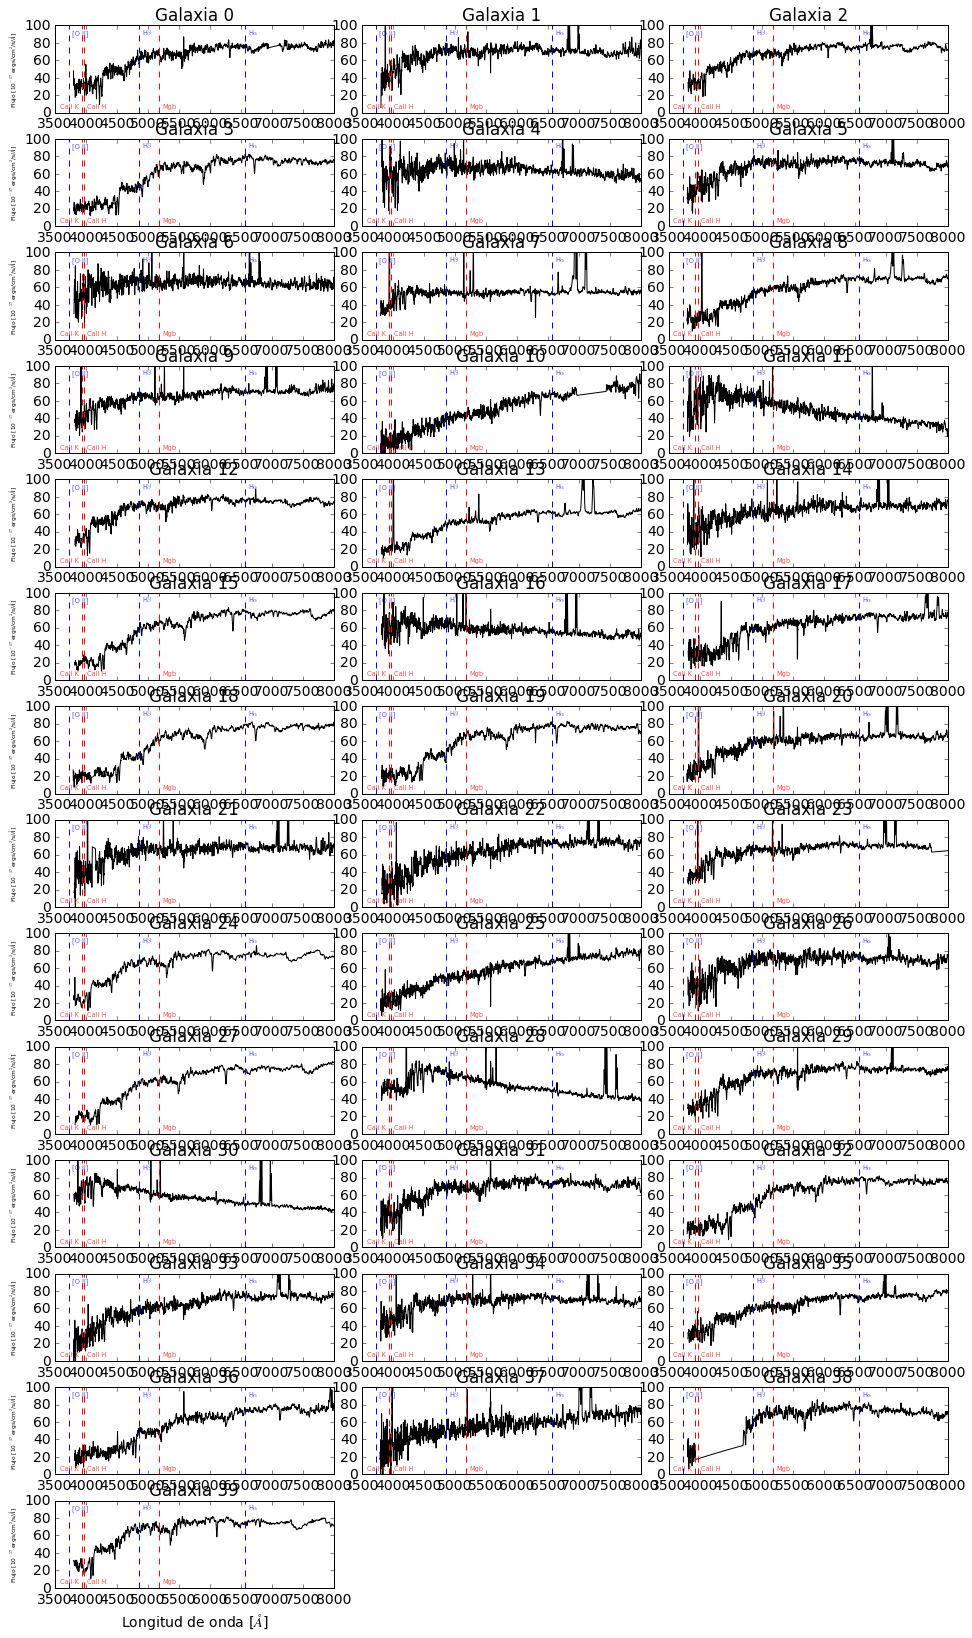

In [7]:
sdss_spectra(coo[0:40],columns=3)

Clasificaremos las 40 galaxias segun las diferentes fructuaciones que se formen en sus longitudes de ondas:

1.-Galaxia con linea de emisión: estas galaxias presentan un peak hacia arrriba ubicada entre el mismo rango de longitud de onda (6000-8000)


2.-Galaxia con ambas lineas: estas galaxias muestran ambas lineas (absorción y emisión) en igual cantidad


3.-Galaxia con linea de absorción: estas galaxias presentan una mayoria de peaks hacia abajo a lo largo de todo el grafico

Galaxia con linea de emision: [2,3,5,6,7,8,9,10,12,14,15,17,18,21,22,23,24,25,26,27,29,30,31,34,35,36,38,40]

Galaxia con linea de absorcion: [4,13,16,19,20,28]

Galaxia con ambas lineas: [1,11,32,33,37,39]

### Parte 3

Clasificaremos la mismas 40 galaxias en diferentes categorías mezclando las longitudes de ondas y su morfología:

1.-Galaxias Espirales

a)  con línea de emisión: 

b)  con línea de absorción:

c)  con ambas líneas:


2.-Galaxias Elipticas

a) con línea de emisión:

b) con línea de absorción:

c) con ambas líneas:


3.-Galaxias Barradas

a) con línea de emisión:

b) con línea de absorción:

c) con ambas líneas:

1.-

a) [2,3,5,6,10,12,15,17,22,23,26,27,31,35,36]

b) [13]

c) [1,11,32]


2.-

a) [25,40]

b) [4,16,19,20,28]

c) [33,37,39]


3.-

a) [7,8,9,14,18,21,24,29,30,34,38]

b) [-]

c) [-]

Al juntar ambas clasificaciones notamos que no todas las galaxias que se parecen morfologicamente compaten las mismas longitudes de onda, pero si hay una gran mayoría que presentan longitudes similares

### Parte 4

In [11]:
data1 ["g"]
x=np.arange(g)
y=np.sin(np.arange(g-r))
plt.scatter(x, y)
plt.title('Grafico de funcion seno')

NameError: name 'g' is not defined

### Parte 5

# Una vez terminada la sesion del taller, debera ejecutar las siguientes dos celdas para subir su trabajo al servidor donde quedara almacenada

In [12]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "notebook_file = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display,Javascript,HTML
import dropbox
import socket
import string

# Get the hostname
hostname=string.split(socket.gethostname(),'.')[0]

# Save the notebook
display(Javascript('IPython.notebook.save_checkpoint();'))

try:
    integrante_exist= (integrante1 != '' and integrante2!= '')
except NameError:
    display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))
else:
    if integrante_exist:
        output_file='/'+notebook_file+'_'+hostname+'_'+integrante1+'_'+integrante2+'_'+integrante3+'.ipynb'
        
        display(HTML("<big><b><br>Nombres de los integrantes:</b></big>"))
        display(HTML("<big>{}<br>{}</big>".format(integrante1,integrante2,integrante3)))
        display(HTML("<big><b><br>Nombre del archivo:</b></big>"))
        display(HTML("<big>{}</big>".format(output_file)))

        client=dropbox.client.DropboxClient('q96bL4l9oyAAAAAAAAAACEK7gCFwoO-PtZu5jJ6gynNwriiBjzTLsN0eV51YQhNe')

        f = open(notebook_file+'.ipynb', 'rb')
        response = client.put_file(output_file,f)
        f.close()
        display(HTML("<big><b><br>Registro del servidor de Dropbox:</b></big>"))
        print response
    else:
        display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))

<IPython.core.display.Javascript object>